#Задание 1. Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [144]:
import tarfile
import os


# Укажите путь к вашему файлу и папку для распаковки
archive_path = "notMNIST_small.tar.gz"
#archive_path = "notMNIST_large.tar.gz"
#extract_path = "notMNIST_small"
extract_path = "notMNIST_large"

# Создайте папку, если она не существует
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

try:
    # Откройте файл .tar.gz
    with tarfile.open(archive_path, "r:gz") as tar:
        # Распакуйте все файлы в указанную папку
        tar.extractall(extract_path)
    print(f"Файлы из {archive_path} успешно распакованы в {extract_path}")
except FileNotFoundError:
    print(f"Ошибка: Файл {archive_path} не найден.")
except tarfile.TarError as e:
    print(f"Ошибка при распаковке архива: {e}")

Ошибка: Файл notMNIST_small.tar.gz не найден.


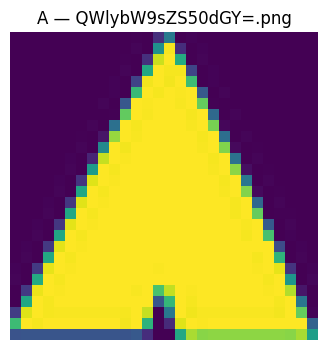

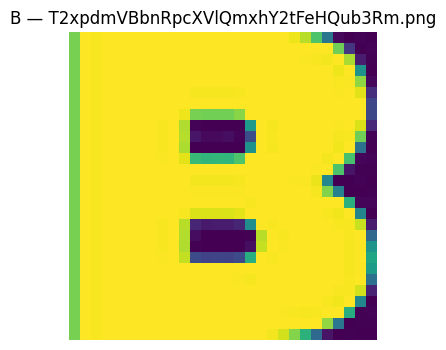

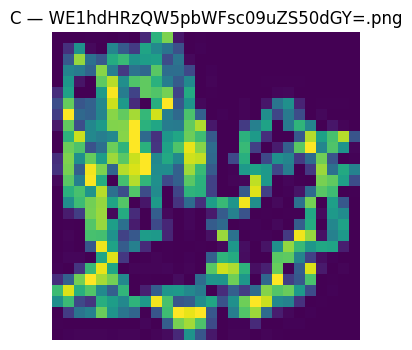

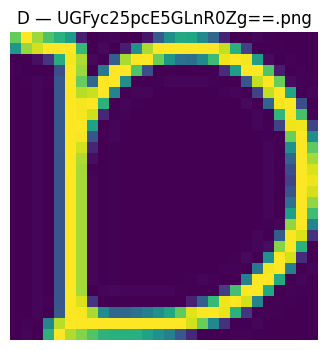

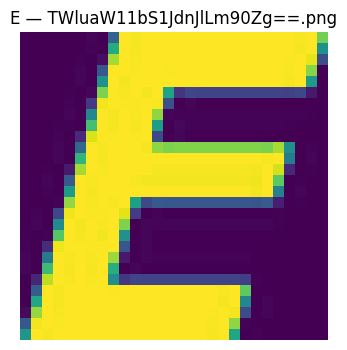

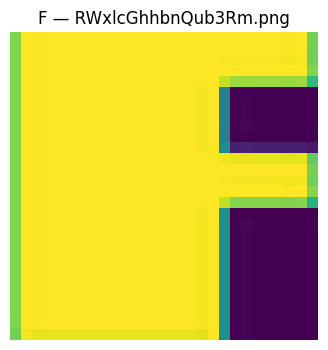

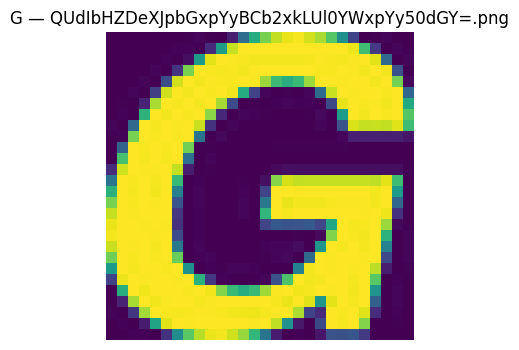

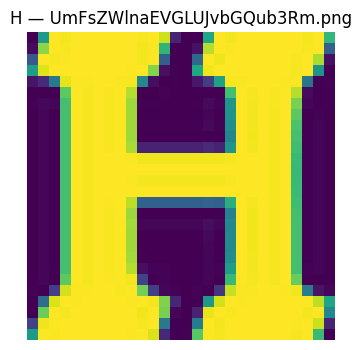

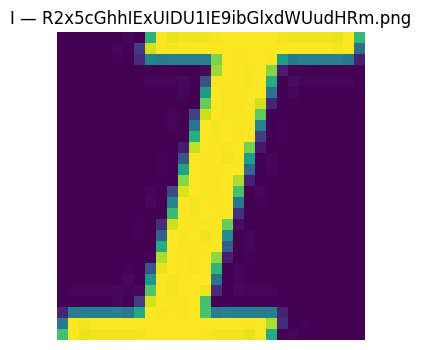

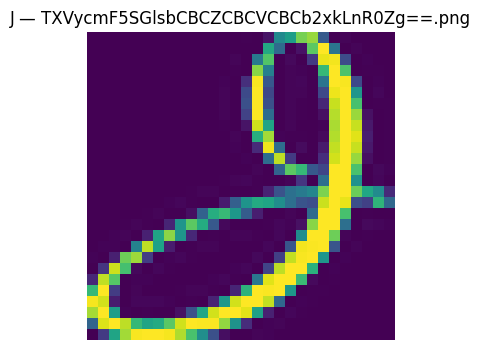

In [156]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 🔹 Проходим по всем подпапкам
for root, dirs, files in os.walk(extract_path):
    # Получаем список изображений в текущей папке
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

    # Если изображения есть — выбираем одно случайное
    if image_files:
        img_name = random.choice(image_files)
        img_path = os.path.join(root, img_name)

        # Загружаем и показываем
        img = Image.open(img_path)
        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.title(f"{os.path.basename(root)} — {img_name}")
        plt.axis('off')
        plt.show()

#Задание 2. Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).
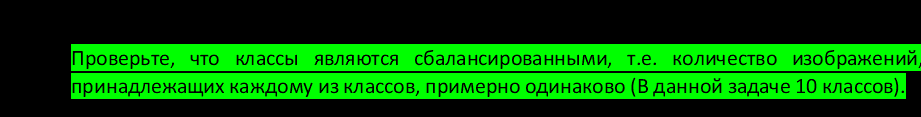

In [148]:
import os
from collections import Counter
import matplotlib.pyplot as plt

total =0
# Count images per class
class_counts = Counter()
for class_name in os.listdir(extract_path):
    class_folder = os.path.join(extract_path, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder)])
        class_counts[class_name] = num_images
        total += num_images
# Print results
for cls, count in class_counts.items():
    print(f"{cls}: count: {count} balance: {count/total}")



52912
105824
158736
211648
264560
317472
370384
423296
476208
529119
A: count: 52912 balance: 0.10000018899340224
B: count: 52912 balance: 0.10000018899340224
C: count: 52912 balance: 0.10000018899340224
D: count: 52912 balance: 0.10000018899340224
E: count: 52912 balance: 0.10000018899340224
F: count: 52912 balance: 0.10000018899340224
G: count: 52912 balance: 0.10000018899340224
H: count: 52912 balance: 0.10000018899340224
I: count: 52912 balance: 0.10000018899340224
J: count: 52911 balance: 0.09999829905937983


In [ ]:
#Задание 3.
#Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [149]:
import os
import shutil
import random

# Пути
source_dir = "notMNIST_large"
output_dir = "split_dataset"
train_size = 200_000
val_size = 10_000
test_size = 19_000

# Создание папок
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

# Сбор всех изображений с указанием класса
all_images = []
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        all_images.extend([(img, class_name) for img in images])

# Перемешивание
random.shuffle(all_images)

# Разделение
train_set = all_images[:train_size]
val_set = all_images[train_size:train_size + val_size]
test_set = all_images[train_size + val_size:train_size + val_size + test_size]

# Функция копирования
def copy_images(image_list, split):
    for img_path, class_name in image_list:
        dest = os.path.join(output_dir, split, class_name, os.path.basename(img_path))
        shutil.copy2(img_path, dest)

# Копирование
copy_images(train_set, 'train')
copy_images(val_set, 'val')
copy_images(test_set, 'test')

print("Разделение завершено.")

Разделение завершено.


#Задание 4.
#Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.
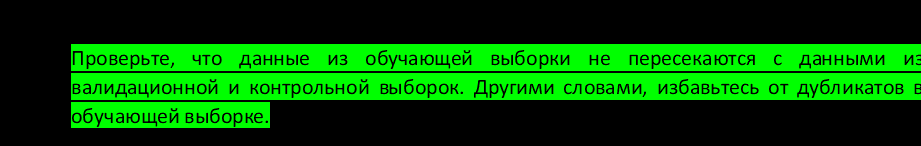

In [150]:
import os
from hashlib import md5

def get_image_hashes(folder_path):
    hashes = set()
    for root, _, files in os.walk(folder_path):
        for fname in files:
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                fpath = os.path.join(root, fname)
                with open(fpath, 'rb') as f:
                    file_hash = md5(f.read()).hexdigest()
                    hashes.add((file_hash, fpath))
    return hashes

# Пути к выборкам
train_dir = "split_dataset/train"
val_dir = "split_dataset/val"
test_dir = "split_dataset/test"

# Получение хэшей изображений
train_hashes = get_image_hashes(train_dir)
val_hashes = get_image_hashes(val_dir)
test_hashes = get_image_hashes(test_dir)

# Преобразуем в словари для быстрого доступа
train_dict = dict(train_hashes)
val_set = set(h for h, _ in val_hashes)
test_set = set(h for h, _ in test_hashes)

# Поиск пересечений
duplicates = val_set.union(test_set).intersection(train_dict.keys())

# Удаление дубликатов из обучающей выборки
for dup_hash in duplicates:
    os.remove(train_dict[dup_hash])
    #print(f"Удалено из train: {train_dict[dup_hash]}")

print(f"Удалено {len(duplicates)} дубликатов из обучающей выборки.")


Удалено из train: split_dataset/train\H\TW90b3IudHRm.png
Удалено из train: split_dataset/train\A\VGFzc2UtQmxhY2tFeHRlbmRlZC5vdGY=.png
Удалено из train: split_dataset/train\J\WnVyaWNoIEJsYWNrIFdpbjk1QlQudHRm.png
Удалено из train: split_dataset/train\F\R2lvdmFubmlTdGQtQm9sZC5vdGY=.png
Удалено из train: split_dataset/train\F\U3ByaW5ndGltZV9GbG91cmlzaC50dGY=.png
Удалено из train: split_dataset/train\B\aGVhZGVyIDA4XzY1LnR0Zg==.png
Удалено из train: split_dataset/train\D\UlNHb3Jkb24udHRm.png
Удалено из train: split_dataset/train\H\TWluc2thSVRDU3RkLUxpZ2h0Lm90Zg==.png
Удалено из train: split_dataset/train\D\Q2FybWluYUJULUJvbGQub3Rm.png
Удалено из train: split_dataset/train\B\VGltZXMgTmV3IFJvbWFuIEl0YWxpYygxKS50dGY=.png
Удалено из train: split_dataset/train\G\VW5hbmltb3VzIC1CUkstLnR0Zg==.png
Удалено из train: split_dataset/train\G\Q2FudGluZS1MaWdodC50dGY=.png
Удалено из train: split_dataset/train\D\RnJpelF1YWRyYXRhLVRoaW4udHRm.png
Удалено из train: split_dataset/train\I\R2FyYW1vbmQtVWx0cmEub3R

#Задание 5.
#Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).
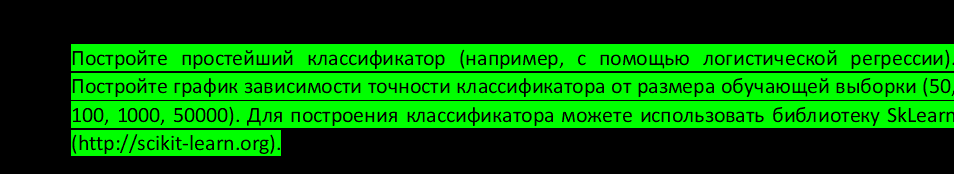

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, train_size=0.7)

samples_size = [y_train.size, y_test.size, y_val.size]
samples_size, sum(samples_size)

([9173, 2752, 1180], 13105)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
def get_score(_clf, X, y):
    predict = _clf.predict(X.reshape(X.shape[0], -1))
    return accuracy_score(predict, y)

clf = LogisticRegression(random_state=42, max_iter=1500)

train_total = len(X_train)
print(train_total)
runs = 5
step = train_total // runs
print(step)
test_scores = []
val_scores = []
sizes = range(step, train_total, step)
print(sizes)
for size in sizes:
    idx = np.random.randint(0, train_total, size=size)
    X = X_train[idx]
    y = y_train[idx]

    clf.fit(X, y)
    test_score = get_score(clf, X_test, y_test)
    test_scores.append(test_score)
    val_scores.append(get_score(clf, X_val, y_val))

    print(f'> {size}: {test_score * 100:.3f}%')


9173
1834
range(1834, 9173, 1834)
> 1834: 87.863%
> 3668: 88.917%
> 5502: 89.172%
> 7336: 89.898%
> 9170: 89.826%


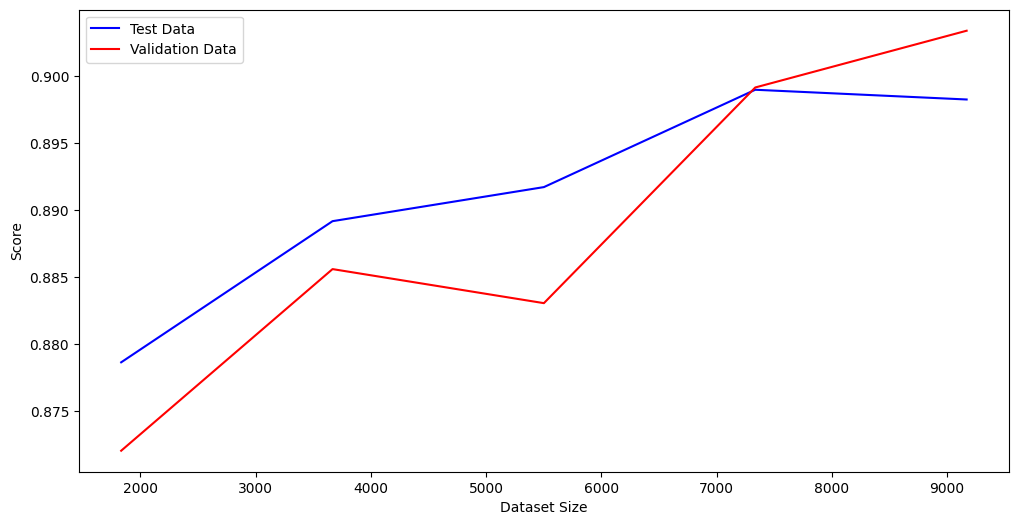

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(sizes, test_scores, 'b', label='Test Data')
plt.plot(sizes, val_scores, 'r', label='Validation Data')
plt.xlabel('Dataset Size')
plt.ylabel('Score')
plt.legend()
plt.show()